In [1]:
import matplotlib.pyplot as plt
from pyMate.Gordo import MriProcessing
from nilearn import image, plotting
from nilearn.glm import threshold_stats_img
from nilearn.plotting import plot_contrast_matrix, plot_design_matrix

%matplotlib inline

In [2]:
root_folder = 'C:\\Users\\carst\\Google Drive\\05_Projects\\NET_fMRI\pyMate'
subject_folder = 'C:\\Users\carst\\Google Drive\\05_Projects\\NET_fMRI\\data\\CM033.zJ1'

micro_session_files = [
    #f'{root_folder}\\micro\\cm033_zj1micro_010.csv',
    #f'{root_folder}\\micro\\cm033_zj1micro_011.csv',
    #f'{root_folder}\\micro\\cm033_zj1micro_012.csv',
    f'{root_folder}\\micro\\cm033_zj1micro_013.csv']

In [7]:
fmri = MriProcessing()

In [8]:
fmri.smoothing_fwhm = 6
fmri.mask_img = None

fmri.session_files = micro_session_files
fmri.subject_folder = subject_folder

In [9]:
fmri.lets_go()

C:\Users\carst\Google Drive\05_Projects\NET_fMRI\pyMate\pyMate\Gordo.py:202: UserWarning: One contrast given, assuming it for all 2 runs
  self.z_map = self.fmri_glm.compute_contrast(self.contrasts['effects_of_interest'], output_type="z_score")
C:\Users\carst\anaconda3\envs\fmri\lib\site-packages\nilearn\glm\contrasts.py:159: UserWarning: Running approximate fixed effects on F statistics.
  contrast = contrast_ if contrast is None else contrast + contrast_
C:\Users\carst\anaconda3\envs\fmri\lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [10]:
fmri.smoothing_fwhm

6

In [5]:
session_info = fmri.load_session_files()

In [6]:
filenames = fmri.get_data_filenames()

In [7]:
fmri_img = fmri.load_fmri_data()

In [8]:
fmri_img = fmri.resample_fmri_data()

In [20]:
design_matrices = fmri.create_design_matrix()

In [21]:
fmri_glm = fmri.fit_glm()

In [22]:
basic_contrasts = fmri.create_contrast_matrix()

In [23]:
contrasts = fmri.create_contrasts()

In [24]:
mean_data = image.mean_img()

TypeError: mean_img() missing 1 required positional argument: 'imgs'

In [25]:
for contrast_id, contrast_val in contrasts.items():

    z_map = fmri_glm.compute_contrast(contrast_val, output_type="z_score")

    _, threshold = threshold_stats_img(z_map, alpha=0.05, height_control="bonferroni", cluster_threshold=10)

    plotting.plot_stat_map(
        stat_map_img=z_map,
        threshold=threshold,
        cut_coords = [9, -1, 4],
        bg_img=mean_data,
        title=contrast_id,
    )
    plotting.show()

AttributeError: 'NoneType' object has no attribute 'items'

C:\Users\carst\AppData\Local\Temp\ipykernel_9532\3877362983.py:1: UserWarning: One contrast given, assuming it for all 8 runs
  z_map = fmri_glm.compute_contrast(contrasts['effects_of_interest'], output_type="z_score")
C:\Users\carst\anaconda3\envs\fmri\lib\site-packages\nilearn\glm\contrasts.py:159: UserWarning: Running approximate fixed effects on F statistics.
  contrast = contrast_ if contrast is None else contrast + contrast_


4.6862267244366755


C:\Users\carst\anaconda3\envs\fmri\lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



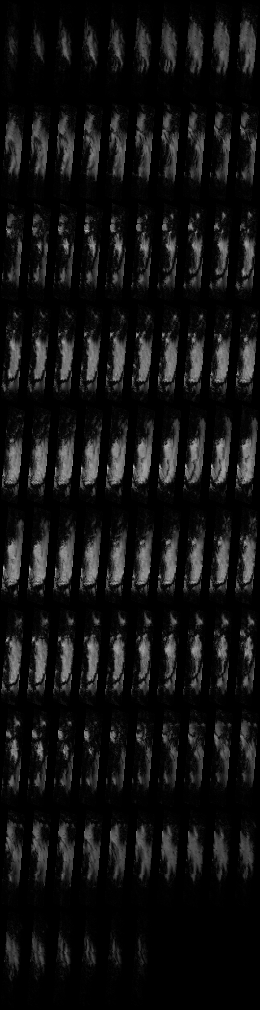
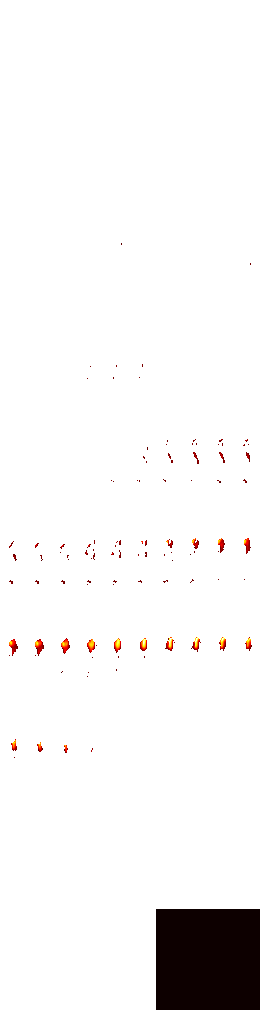

In [15]:
z_map = fmri_glm.compute_contrast(contrasts['effects_of_interest'], output_type="z_score")
_, threshold = threshold_stats_img(z_map, alpha=0.05, height_control="bonferroni", cluster_threshold=10)
print(threshold)

ax_stat = plotting.view_img(
    stat_map_img=z_map, 
    threshold=threshold,
    bg_img=mean_data,      
    title="Activation Map")

ax_stat.resize(1050, 550)

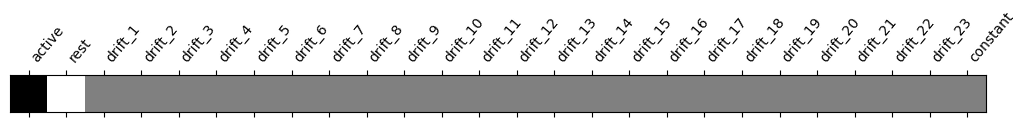

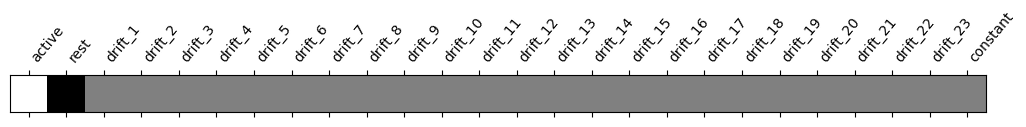

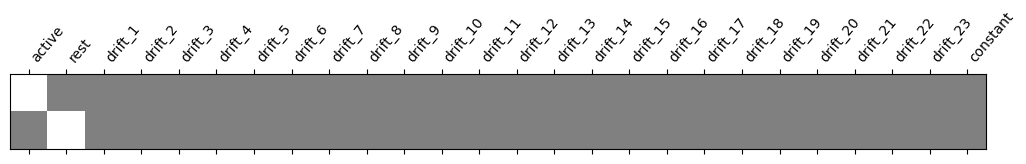

In [16]:
for contrast_id, contrast_val in contrasts.items():
    plot_contrast_matrix(contrast_val, design_matrix=design_matrices[0])

Read in and prepare all the relevant data 

elec_data, meta = read_h5(elec_filename)
start = 0
stop = len(elec_data[0]) / meta['scan_rate_hz']
step = 1 / meta['scan_rate_hz']

elec_time = np.arange(start, stop, step)

Text(0.5, 1.0, 'Expected Response')

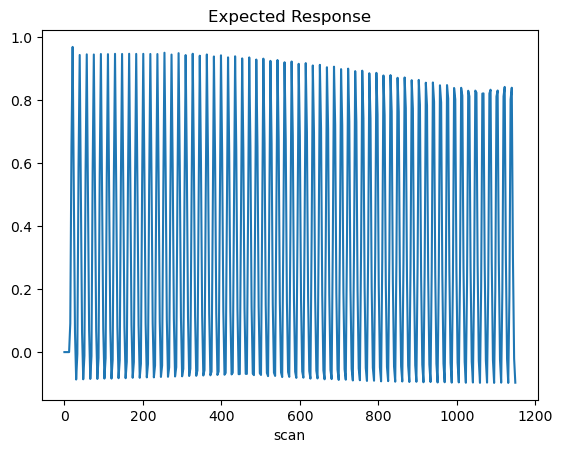

In [17]:
fig, ax = plt.subplots(1, 1)
ax.plot(design_matrices[0]['active'])
ax.set_xlabel("scan")
ax.set_title("Expected Response")

<Axes: label='conditions', ylabel='scan number'>

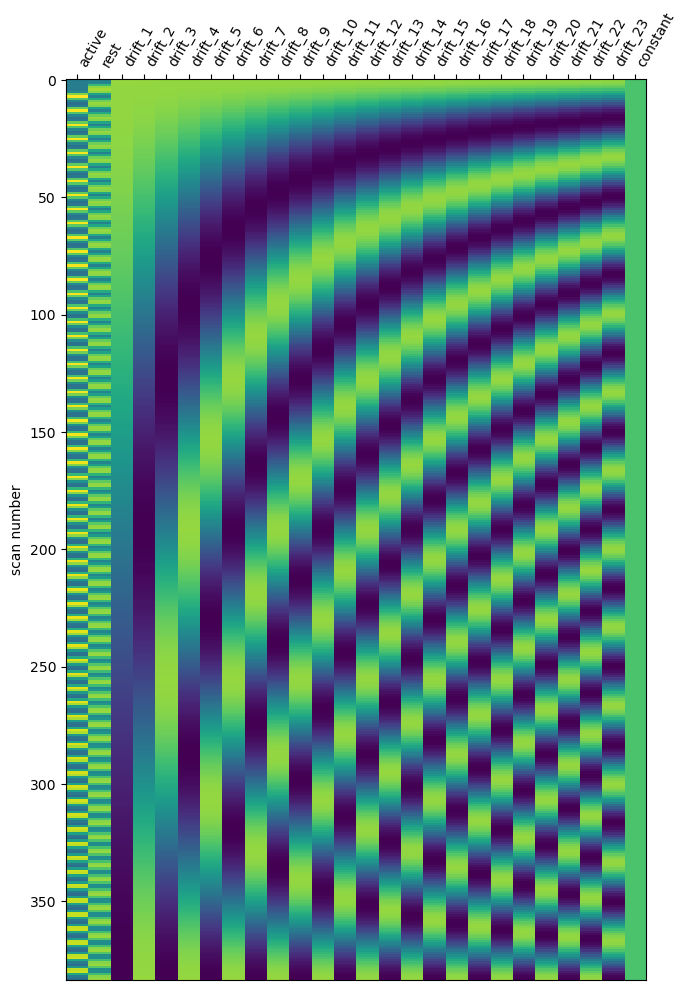

In [18]:
plot_design_matrix(design_matrices[0])